# Vertical eddy diffusivity producing instability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import xarray as xr
from datetime import date

%matplotlib inline

###### Parameters:

In [192]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# interpolated files:
year   = 2002
folder = '/data/brogalla/ANHA4_remapped_fullfill_working/'
folder = '/data/brogalla/ANHA4_remapped_notworking/'

Load files:

In [193]:
ref   = xr.open_dataset(f"/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc")
lons  = ref['nav_lon'].values
lats  = ref['nav_lat'].values
depth = ref['nav_lev'].values
tmask = ref['tmask'].values[0,:,:,:]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [194]:
fileW = xr.open_dataset(f'{folder}ANHA4-EXH005_5d_gridW_y2002m01d05.nc')
votkeavt = np.ma.masked_where((tmask < 0.1), fileW['votkeavt'][0,:,:,:].values)

ANHA4 run stays stable if I fill "[10:, imin:imin+200, jmin+300:jmin+400]" with a mean background value.

In [195]:
votkeavt_issue_area = votkeavt[10:50,imin:imin+200,jmin+300:jmin+400]
votkeavt_elsewhere  = votkeavt[0:10,imin:imin+200,jmin+300:jmin+400]

print(f'Votkeavt in issue area-----------')
print(f'Min: {np.ma.min(votkeavt_issue_area):.2f}, max: {np.ma.max(votkeavt_issue_area):.2f}, mean: {np.ma.mean(votkeavt_issue_area):.2f}')
print(f'Votkeavt elsewhere---------------')
print(f'Min: {np.ma.min(votkeavt_elsewhere):.2f}, max: {np.ma.max(votkeavt_elsewhere):.2f}, mean: {np.ma.mean(votkeavt_elsewhere):.2f}')

Votkeavt in issue area-----------
Min: 0.00, max: 10.00, mean: 1.20
Votkeavt elsewhere---------------
Min: 0.00, max: 10.00, mean: 7.22


In [196]:
# votkeavt_copy = np.copy(votkeavt)
# votkeavt_copy[10:50,imin:imin+200,jmin+300:jmin+400] = 1.0

##### Functions:

In [197]:
def plot_layer(layer, variable):#, vmin=0,vmax=35):
    try:
        plot_var = variable[layer,imin:imax,jmin:jmax]
    except:
        plot_var = variable[imin:imax,jmin:jmax]
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/easternCAA.pickle','rb'))

    x, y = proj1(lons[imin:imax,jmin:jmax], lats[imin:imax,jmin:jmax])

    contour = proj1.contourf(x, y, plot_var, cmap=cmocean.cm.thermal, vmin=0, vmax=2e-5, levels=np.linspace(0,2e-5,11))
    proj1.plot(x[0,300:400]  , y[0,300:400]  , '-w')
    proj1.plot(x[200,300:400], y[200,300:400], '-w')
    proj1.plot(x[0:200,300]  , y[0:200,300]  , '-w')
    proj1.plot(x[0:200,400]  , y[0:200,400]  , '-w')
    cbar_ax = fig.add_axes([0.9, 0.2, 0.04, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=[0,2e-6,4e-6,6e-6,8e-6,10e-6,12e-6,14e-6,16e-6,18e-6,20e-6])
    cbar_ax.tick_params(axis='both', which='major', labelsize=6)
    
    return

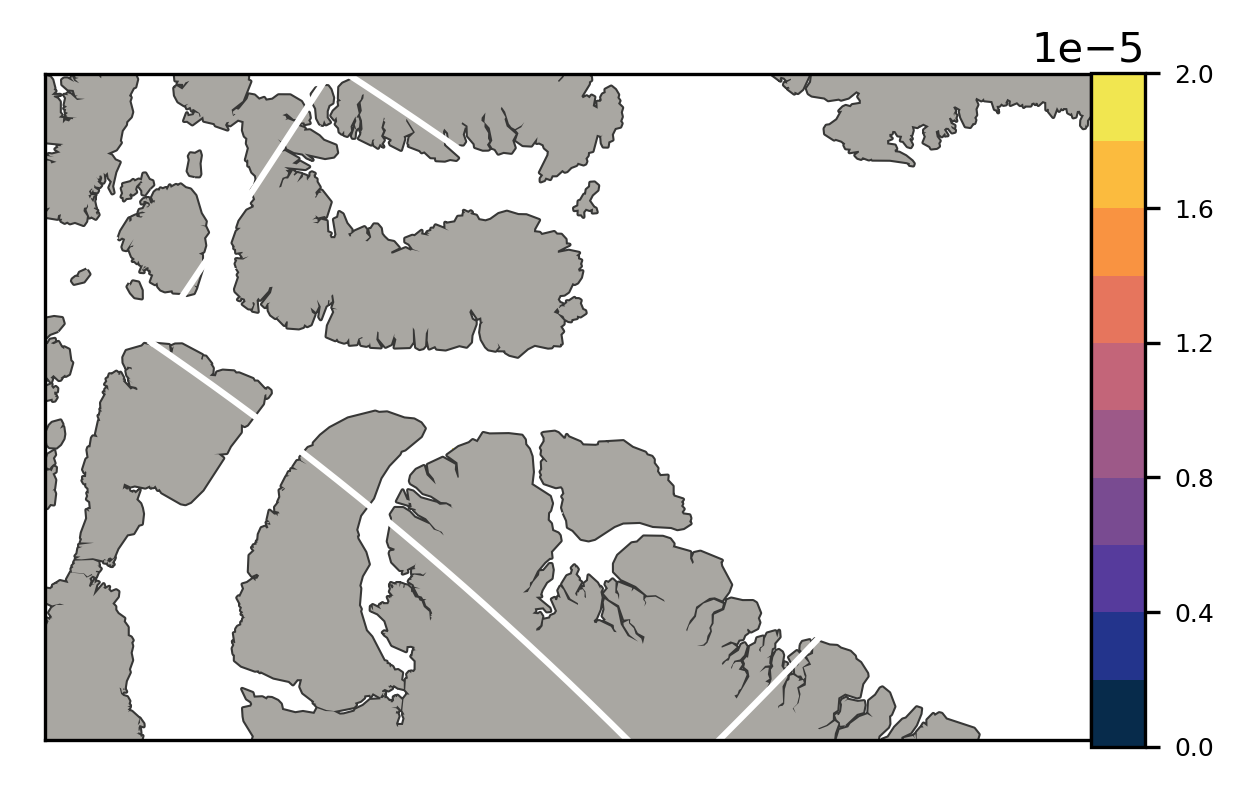

In [198]:
plot_layer(0,votkeavt)

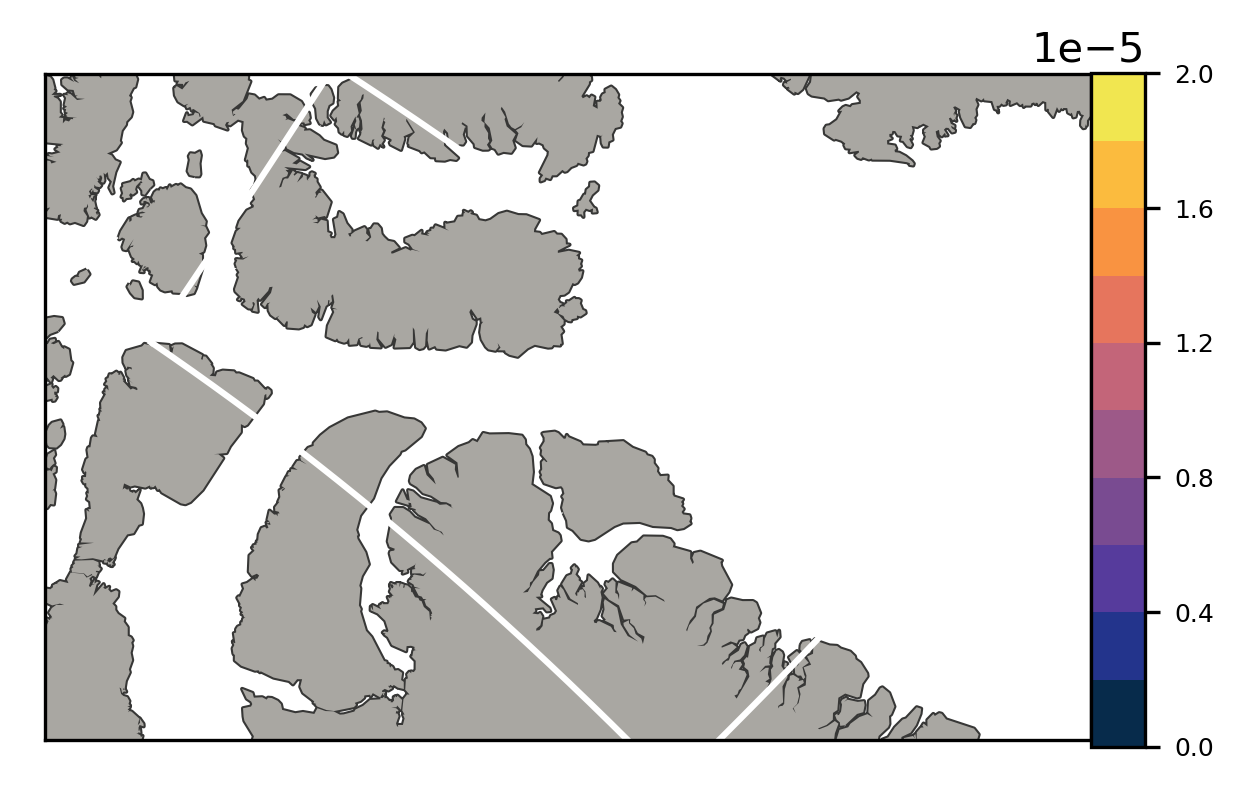

In [199]:
plot_layer(5,votkeavt)

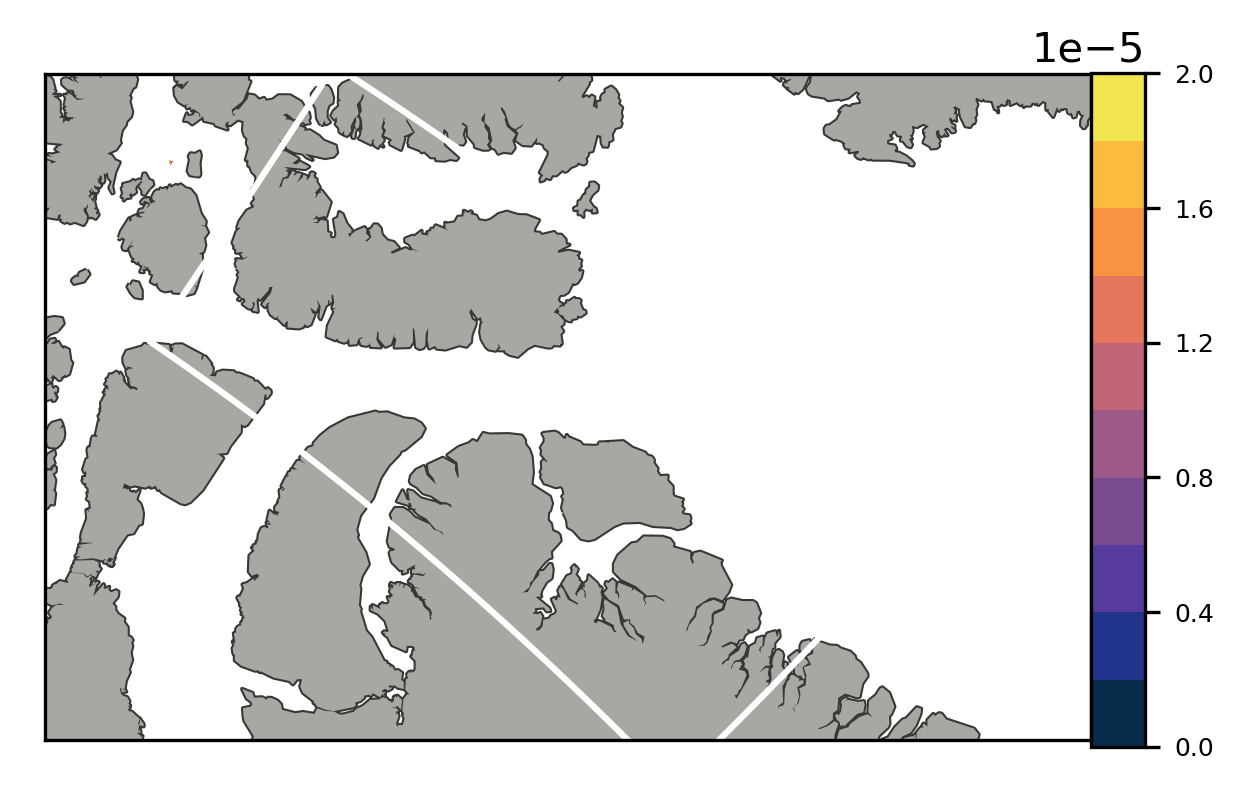

In [200]:
plot_layer(6,votkeavt)

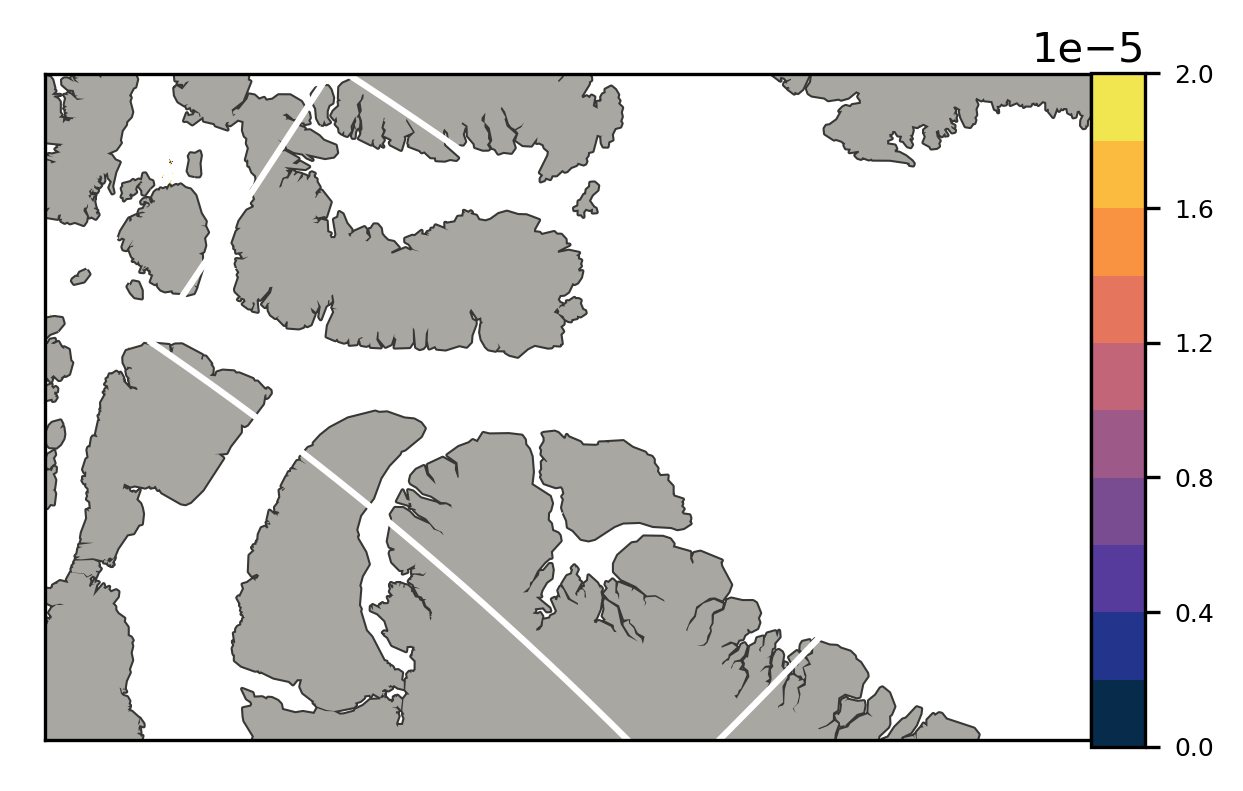

In [201]:
plot_layer(7,votkeavt)

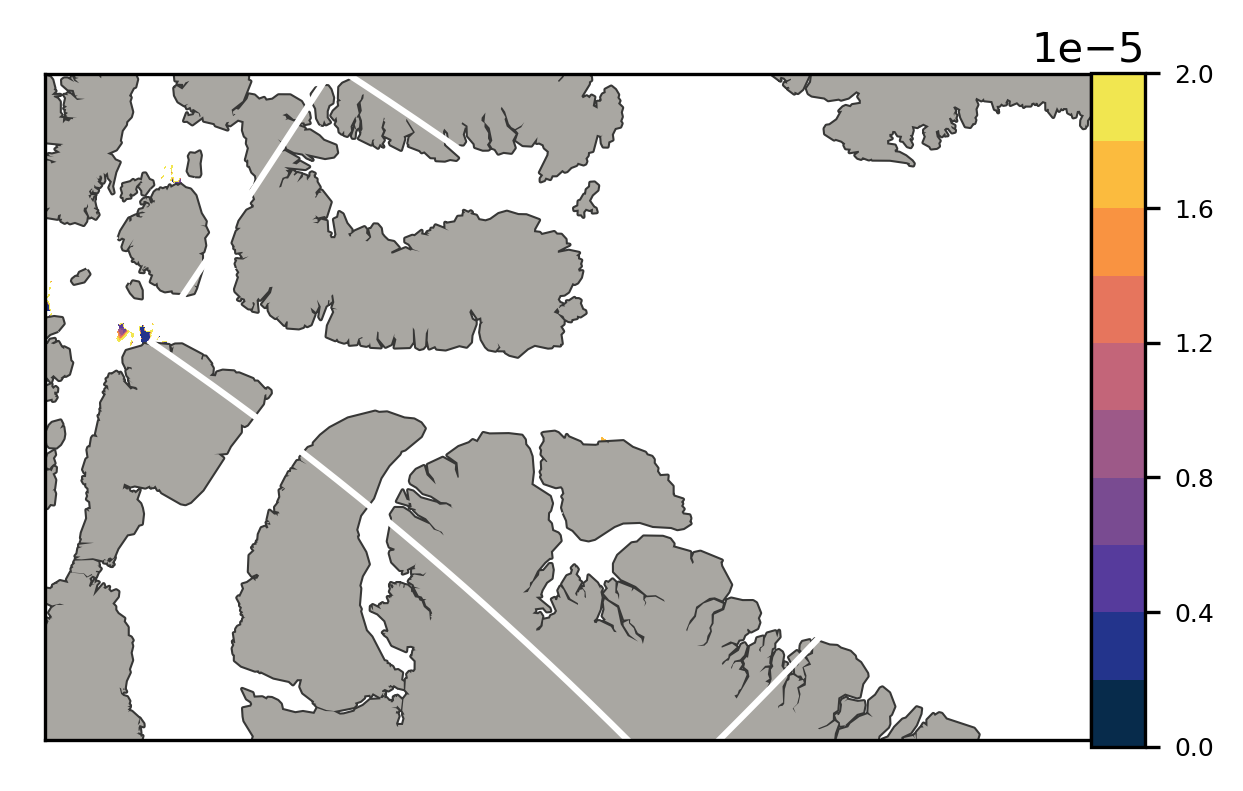

In [202]:
plot_layer(8,votkeavt)

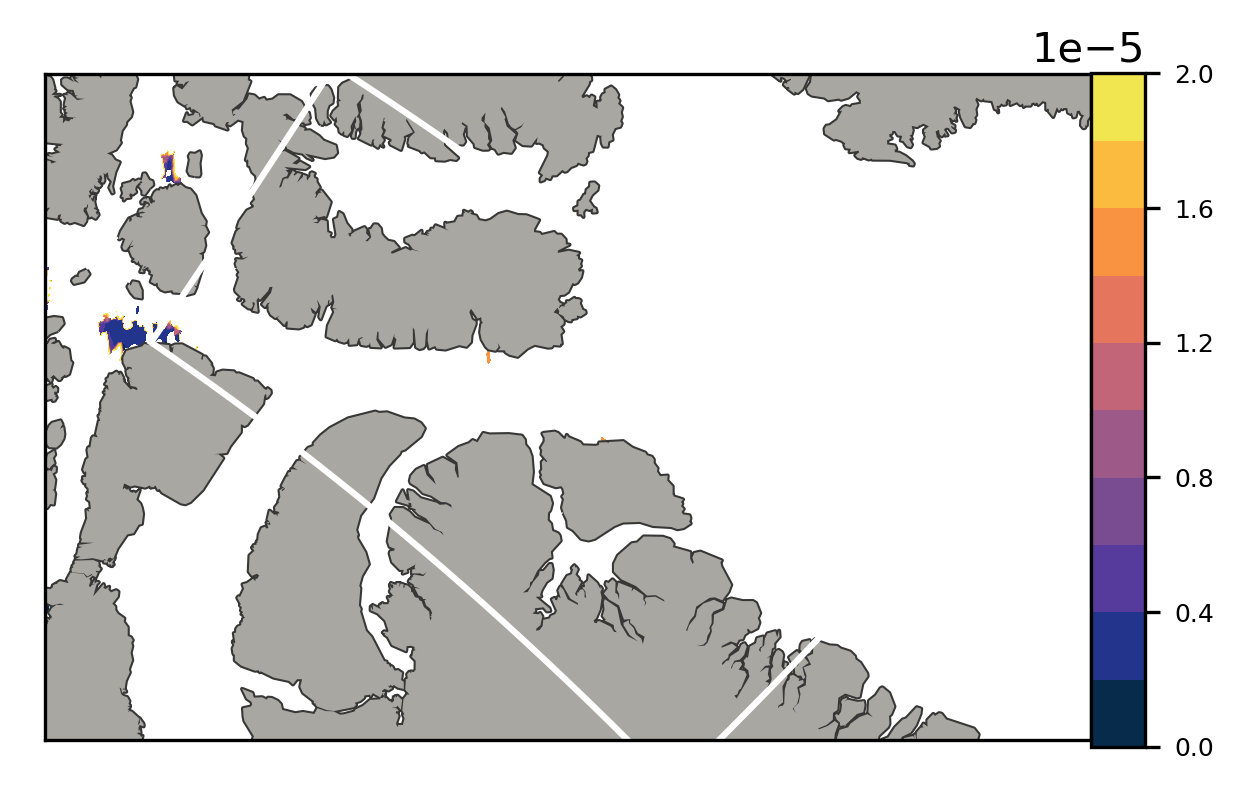

In [203]:
plot_layer(9,votkeavt)

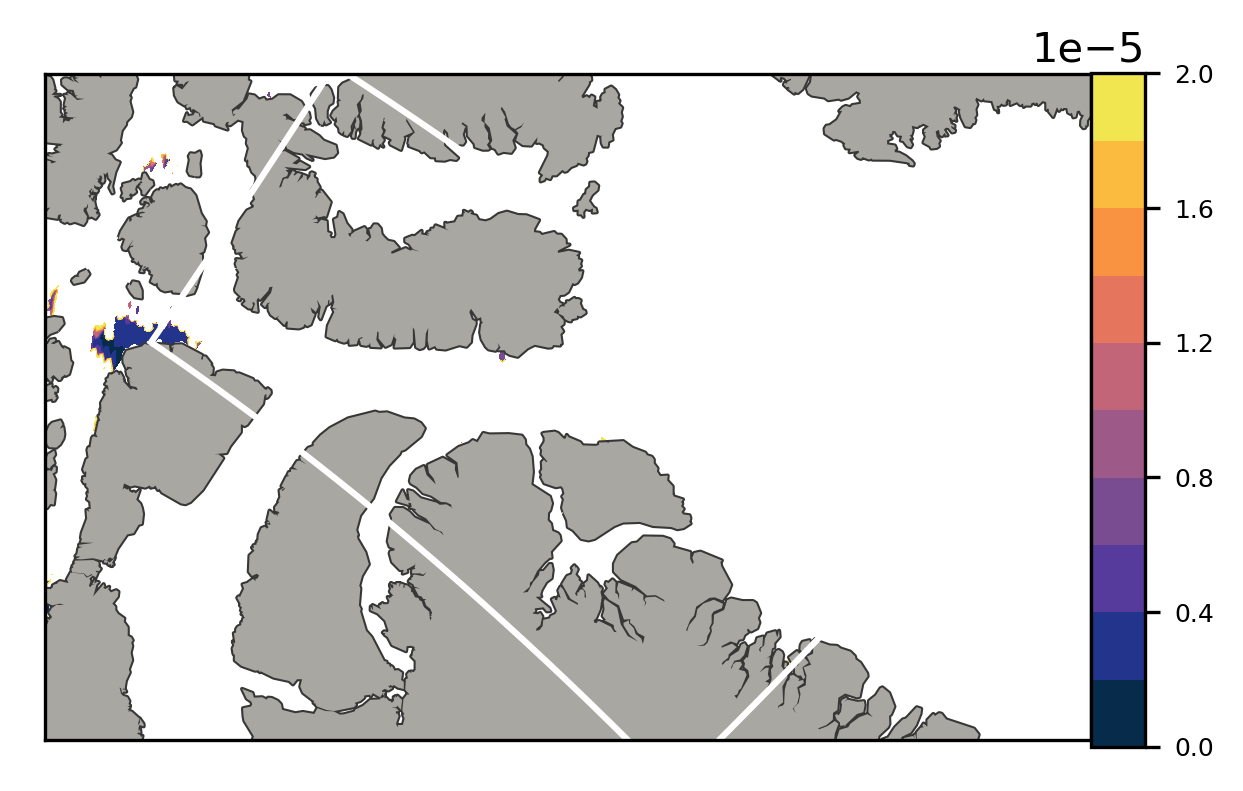

In [204]:
plot_layer(10,votkeavt)

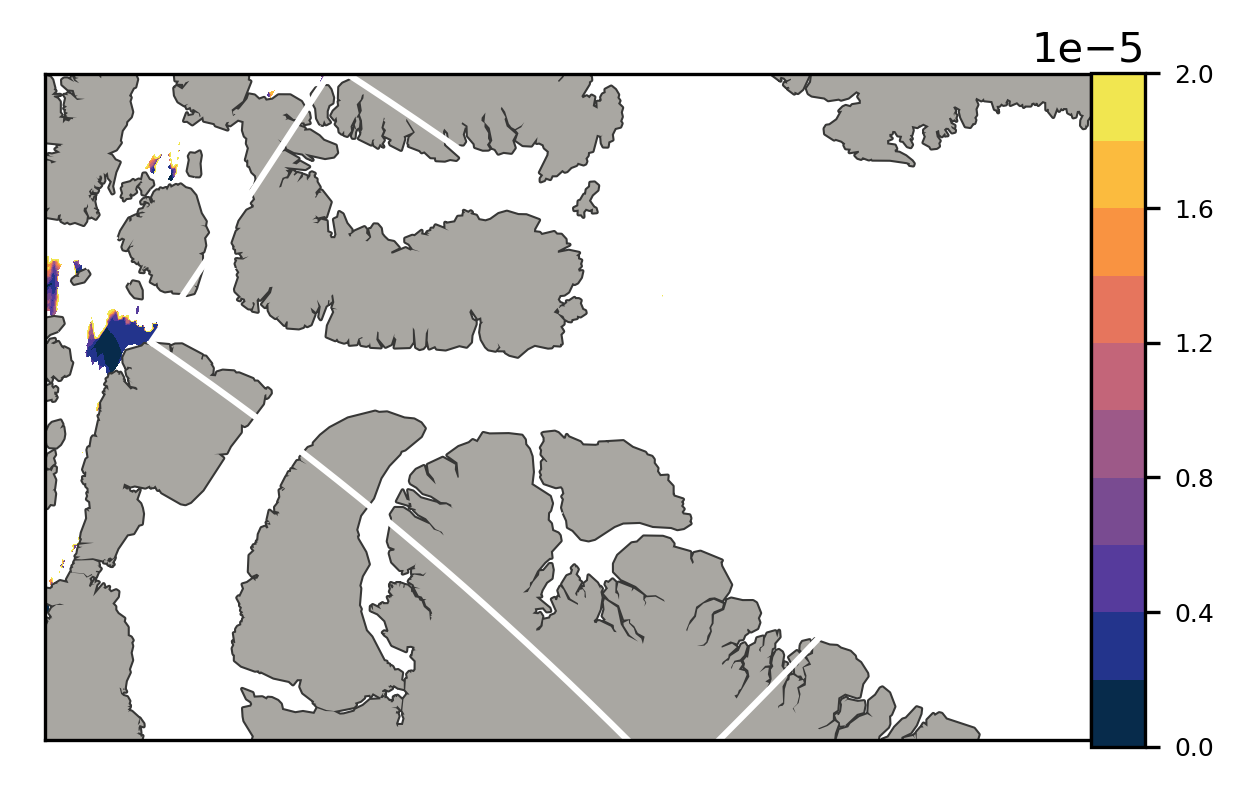

In [205]:
plot_layer(11,votkeavt)

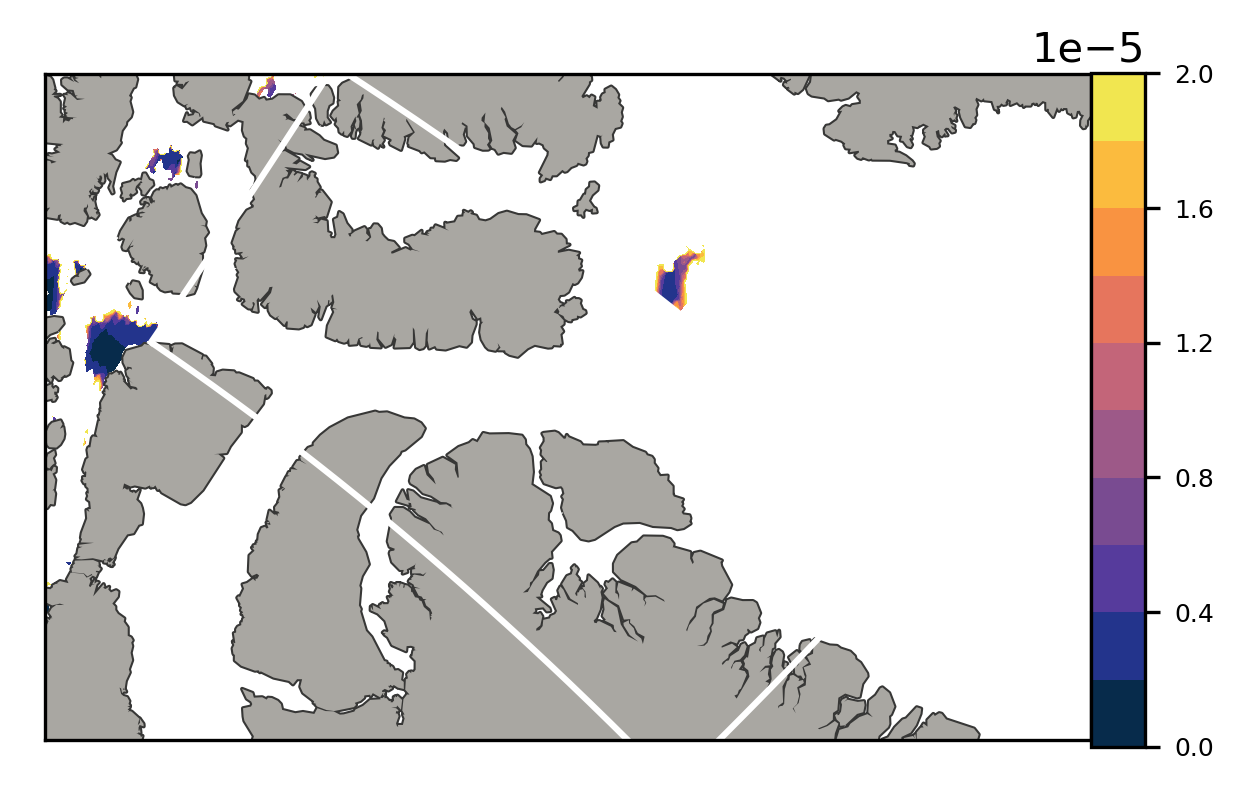

In [206]:
plot_layer(12,votkeavt)

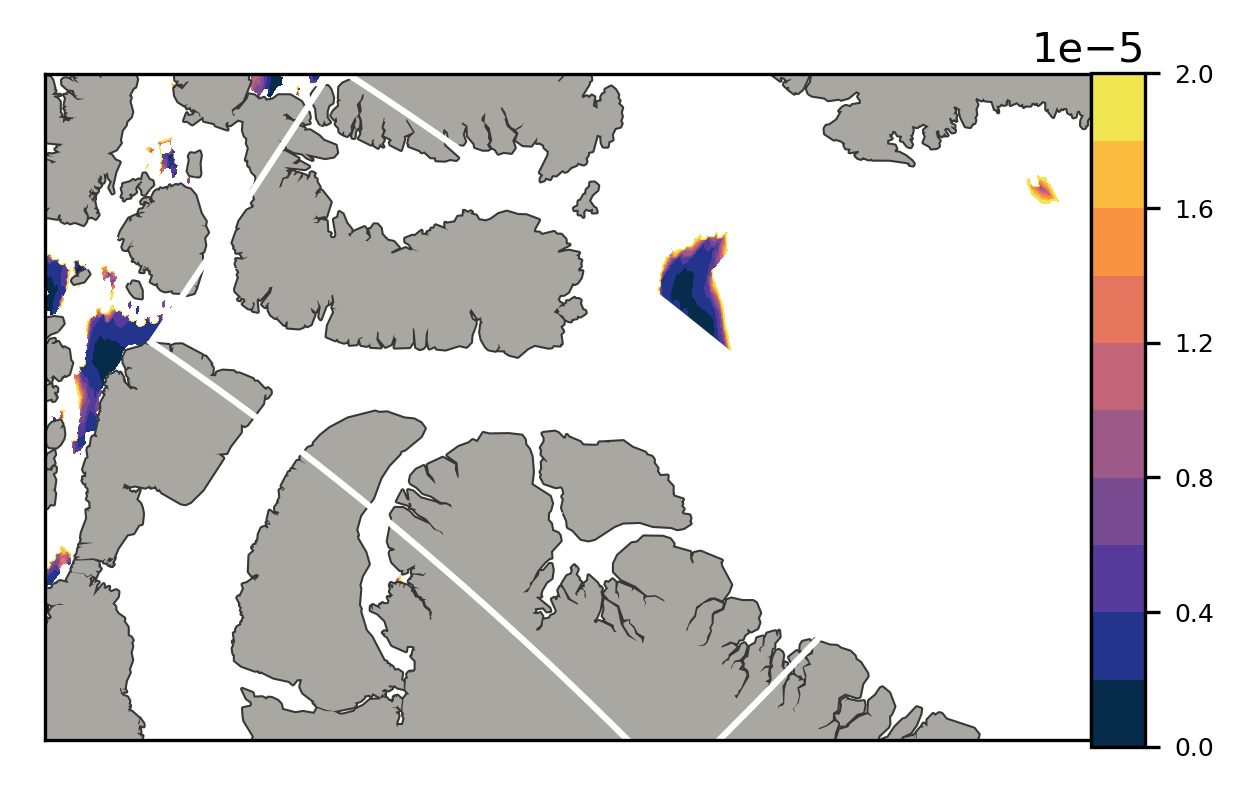

In [207]:
plot_layer(13,votkeavt)

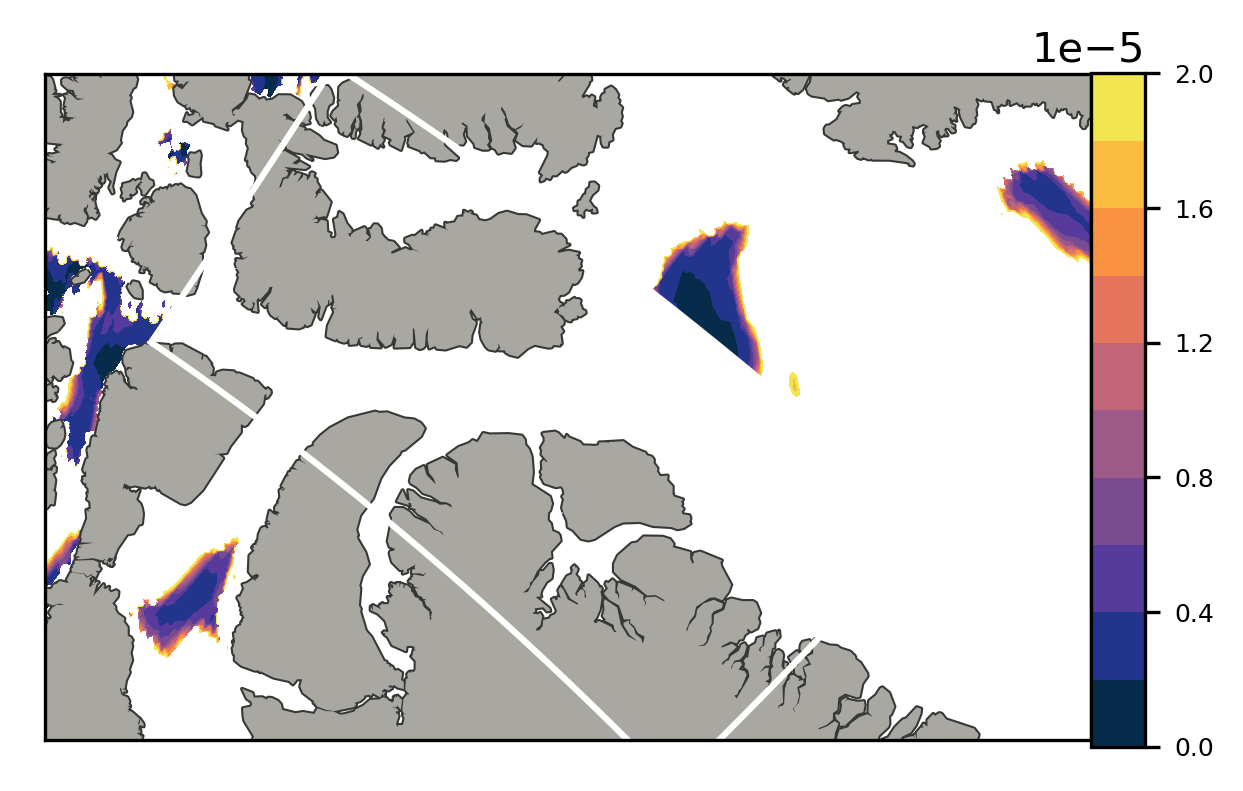

In [208]:
plot_layer(14,votkeavt)

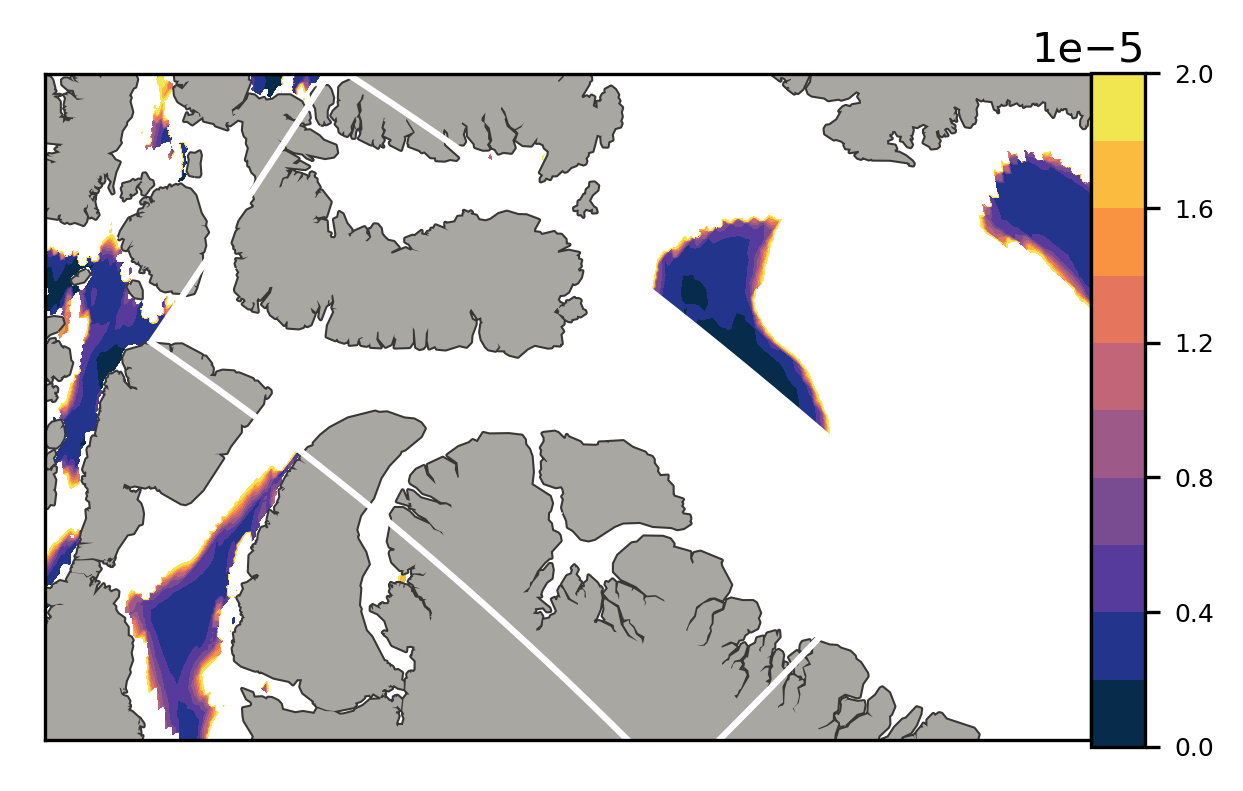

In [209]:
plot_layer(15,votkeavt)

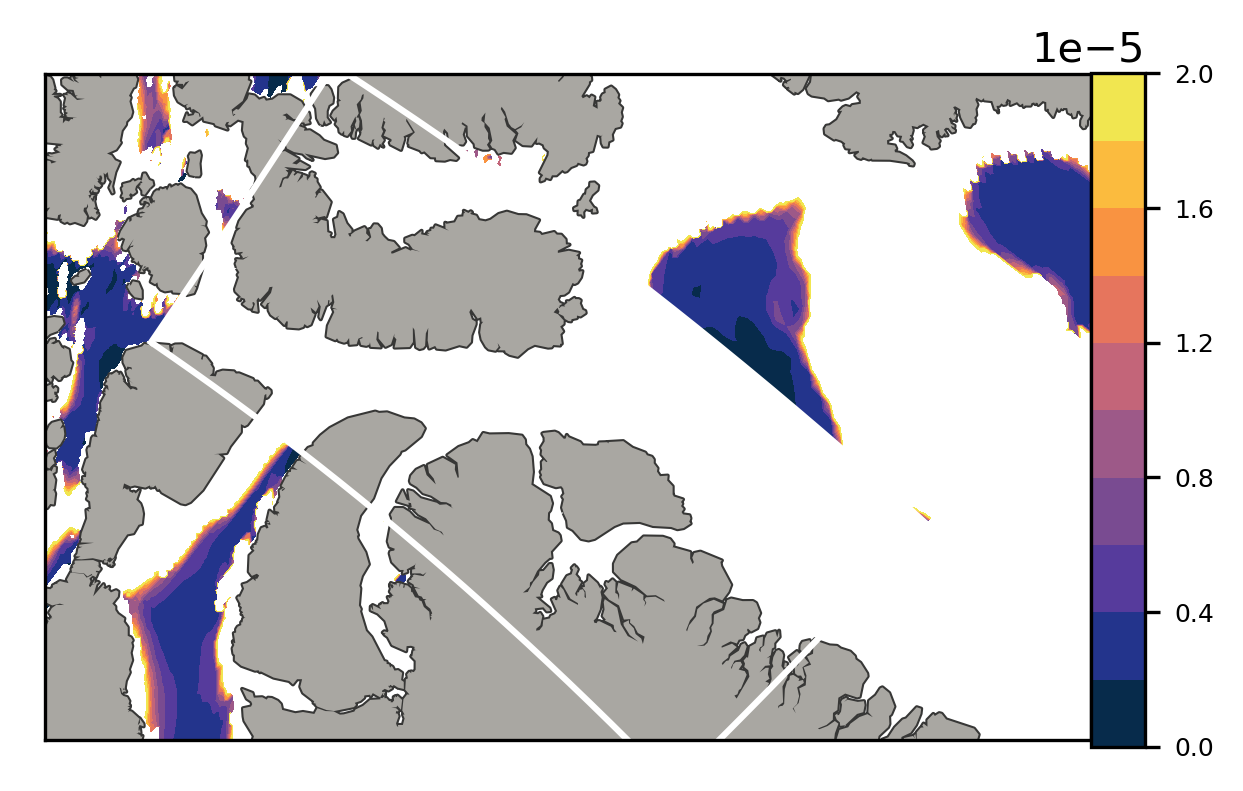

In [210]:
plot_layer(16,votkeavt)

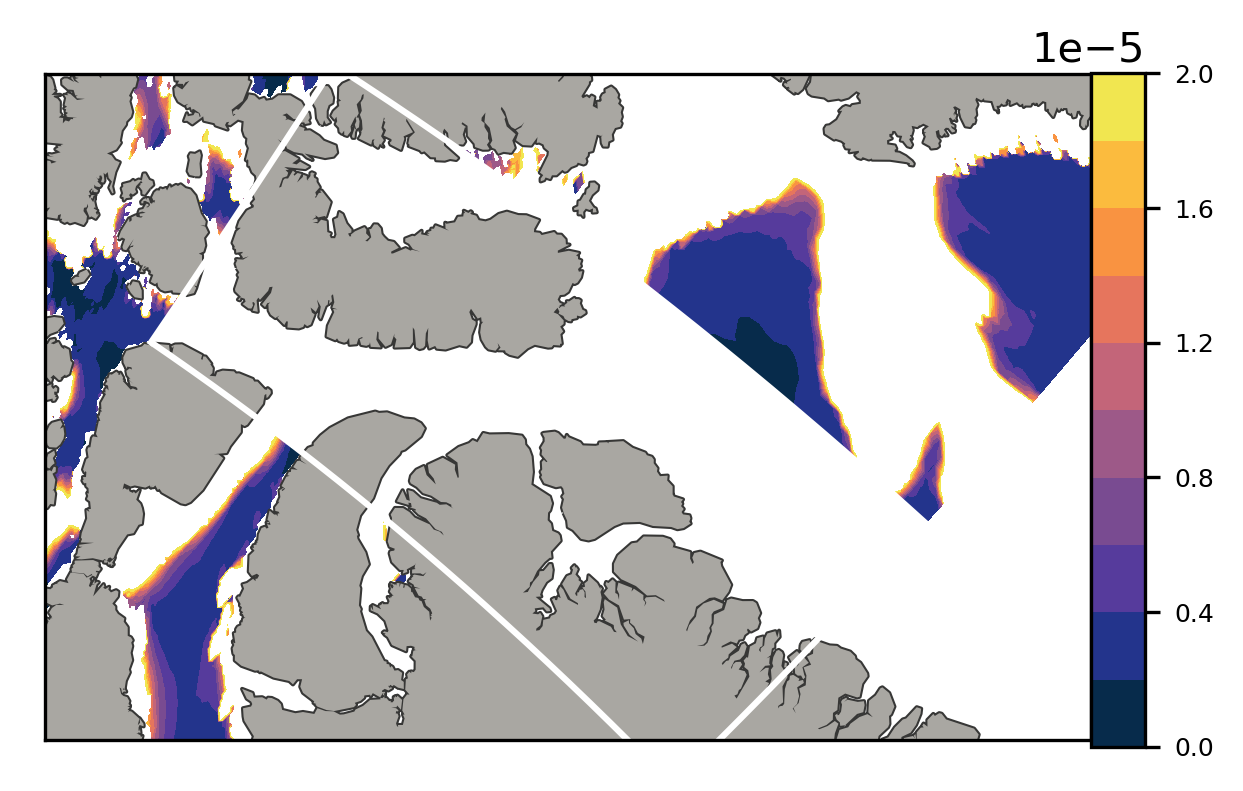

In [211]:
plot_layer(17,votkeavt)

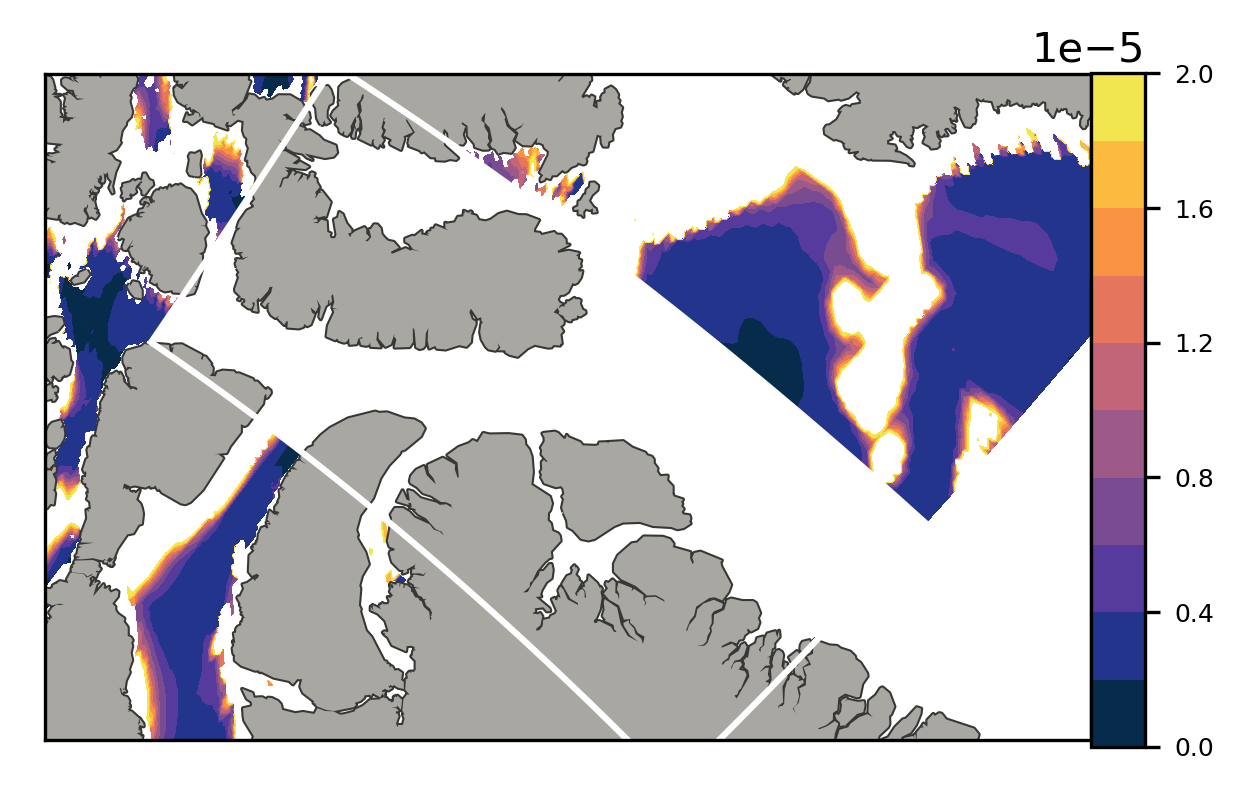

In [212]:
plot_layer(18,votkeavt)

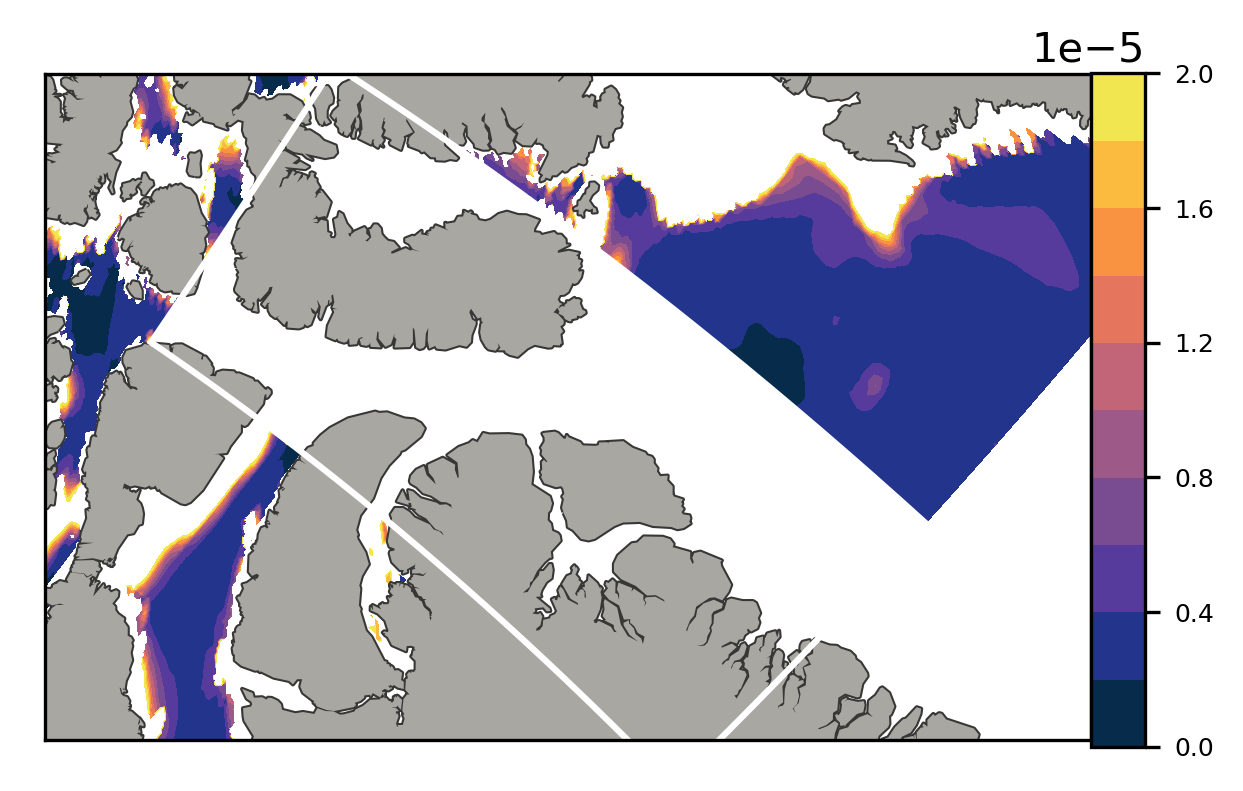

In [213]:
plot_layer(19,votkeavt)

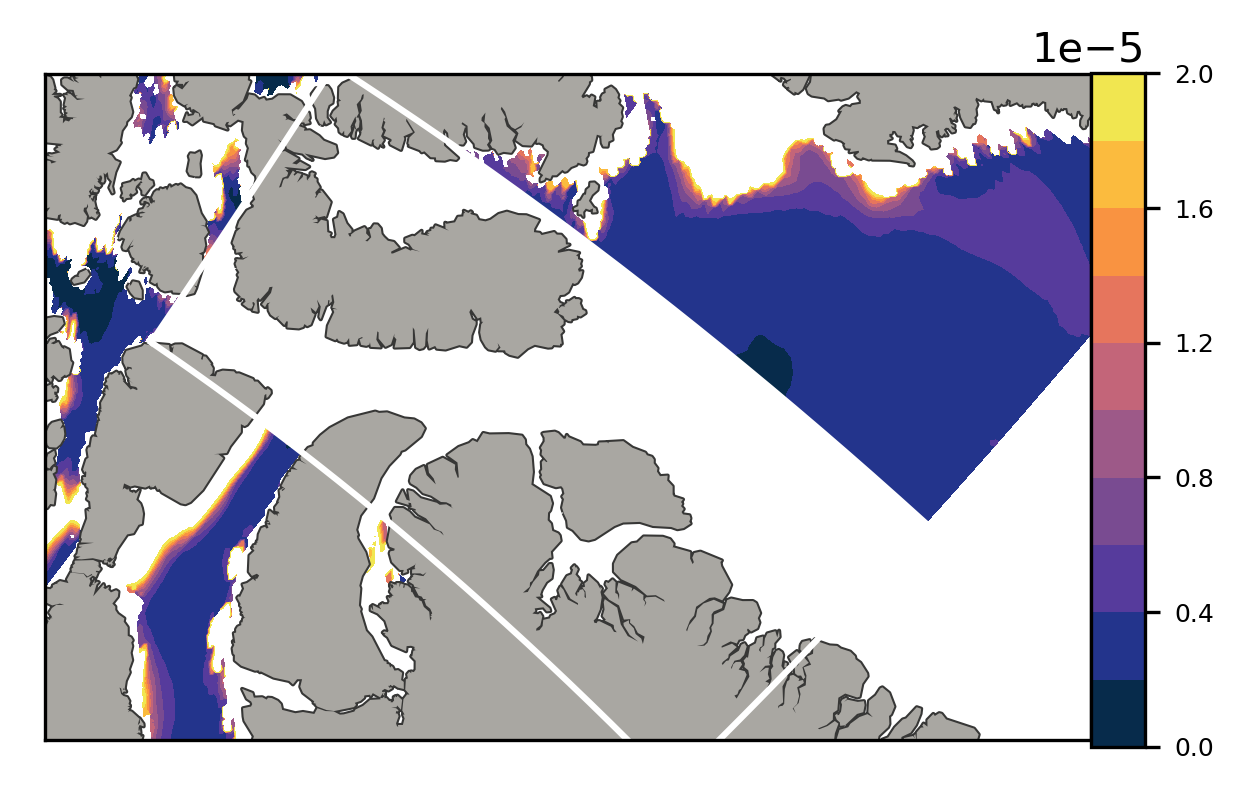

In [214]:
plot_layer(20,votkeavt)